In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pmdarima as pm

In [2]:
file_path = r"C:\Users\HP\OneDrive\Desktop\NLP\Data\ML471_S2_Datafile_Practice.csv"
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
series = df['Close_diff'].dropna()

In [3]:
train_size = int(len(series) * 0.8)
train = series[:train_size]
test = series[train_size:]

In [4]:
auto_model = pm.auto_arima(
    train,
    seasonal=False,
    stepwise=True,
    suppress_warnings=True,
    trace=True
)
print("Best model:", auto_model.order)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=486.259, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=486.068, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=481.903, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=481.450, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=483.443, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=483.440, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=485.437, Time=0.46 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=479.591, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=482.520, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=481.510, Time=0.60 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=481.420, Time=0.47 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=480.336, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.44 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 4.290 seconds
Best model: (0, 0, 1)


In [5]:
model = ARIMA(train, order=auto_model.order)
fitted_model = model.fit()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [6]:
forecast = fitted_model.forecast(steps=len(test))

In [7]:
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100
print("\nModel Performance:")
print("MAE :", mae)
print("RMSE:", rmse)
print("MAPE:", mape)


Model Performance:
MAE : 2.8338005457023305
RMSE: 3.5176336958644754
MAPE: 101.61131455614574


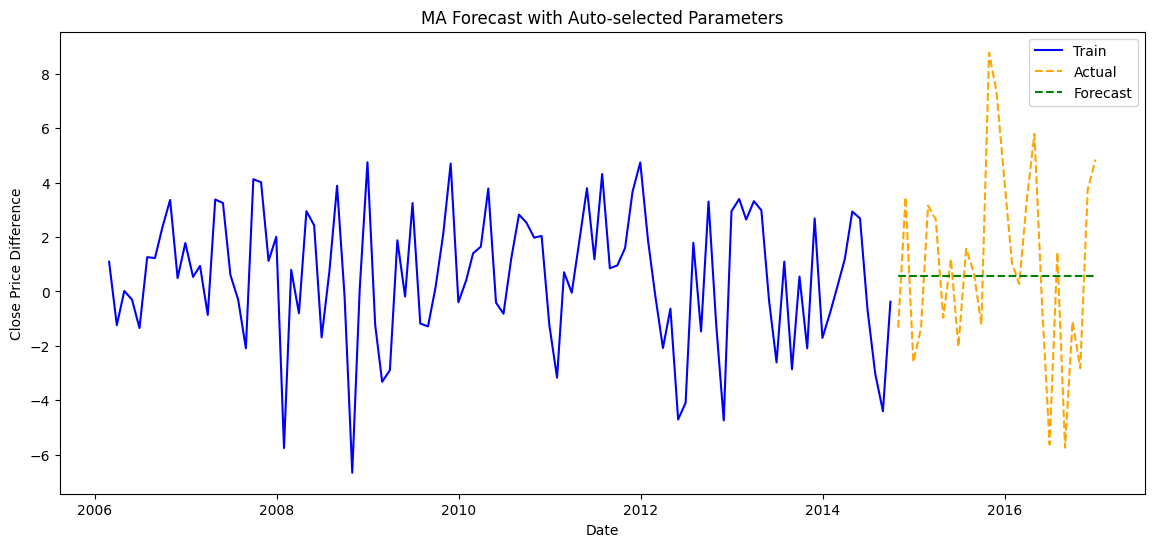

In [8]:
plt.figure(figsize=(14,6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Actual', color='orange', linestyle='--')
plt.plot(test.index, forecast, label='Forecast', color='green', linestyle='--')
plt.title("MA Forecast with Auto-selected Parameters")
plt.xlabel("Date")
plt.ylabel("Close Price Difference")
plt.legend()
plt.show()